In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

In [2]:
x, y = load_iris(return_X_y=True)
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
x = pd.DataFrame(x, columns=columns)
y = pd.DataFrame(y, columns=['Species'])

In [3]:
x.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [5]:
model = DBSCAN(eps=.8, min_samples=19).fit(x)
model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)

In [6]:
Counter(model.labels_)

Counter({-1: 6, 0: 50, 1: 94})

In [7]:
x['labels'] = model.labels_

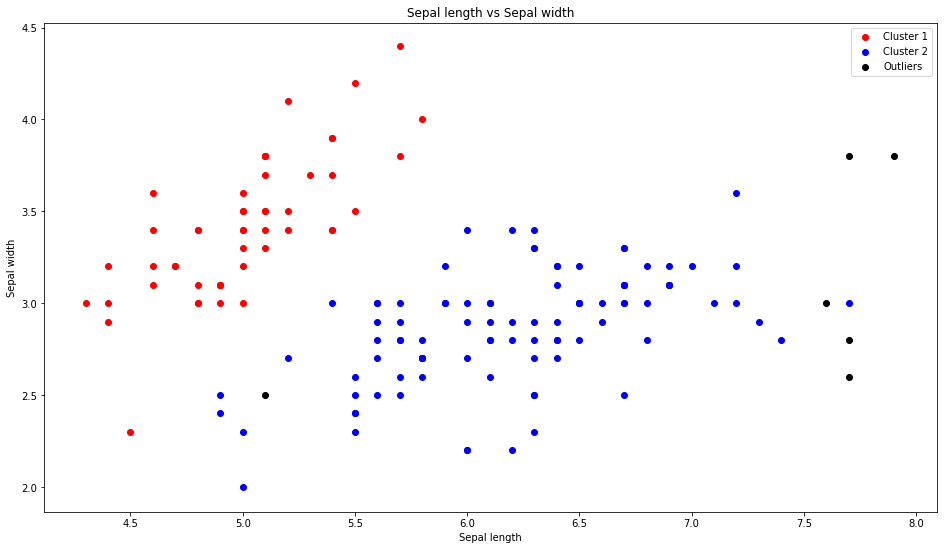

In [8]:
colors = model.labels_
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x['Sepal length'].values[model.labels_ == 0], x['Sepal width'].values[model.labels_ == 0], c='r', label='Cluster 1')
ax.scatter(x['Sepal length'].values[model.labels_ == 1], x['Sepal width'].values[model.labels_ == 1], c='b', label='Cluster 2')
ax.scatter(x['Sepal length'].values[model.labels_ == -1], x['Sepal width'].values[model.labels_ == -1], c='k', label='Outliers')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('Sepal length vs Sepal width')
ax.legend()